# **Play Store App Review Analysis** 

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

In this project we will analyse this data with different types of features. categorywise, ratingwise, sizewise, genreswise, versionwise etc.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# paths
path_psd = './data/Play Store Data.csv'
path_review = './data/User Reviews.csv'

# class defination for dataframe
class PlayStoreAppReviewAnalysis:
    def __init__(self, path):
        ''' Takes path of the csv file while creating object '''
        # read the file
        self.df =pd.read_csv(path)
        # calculate and assign null to null_df
        self.null_df = self.df.isna().sum().reset_index().rename(columns={'index':'features', 0:'null_count'})
        self.null_df['null_pct'] = round(self.null_df['null_count']/len(self.df)*100,2)
    # get dataframe
    def get_df(self):
        ''' returns dataframe '''
        return self.df
        
    def show_info(self):
        ''' takes nothing and displays basic informations about the dataframe '''
        print('Shape : ',self.df.shape)
        print()
        print('Duplicate count : ',self.df.duplicated().sum())
        print()
        print('Columns : ',list(self.df.columns))
        print()
        print('Info :')
        print(self.df.info())

    # Missing/null
    def null_calculator(self,df):
        ''' takes dataframe and returns null details '''
        n = len(df)
        df = df.isna().sum().reset_index().rename(columns={'index':'features', 0:'null_count'})
        df['null_pct'] =round(df['null_count']/n*100,2)
        return df
    def show_null(self):
        ''' displays null details '''
        print(self.null_df)

    def plot_null(self):
        ''' plot bar chart for null values '''
        plt.rcParams['figure.figsize']=(14,.25*len(self.null_df))
        sns.barplot(self.null_df, x='null_count', y='features')
        plt.show()
    # Unique
    def show_all_unique_count(self):
        ''' displays unique values for each column '''
        print('Unique values')
        print(self.df.nunique())

    # def get_all_unique(self):
    #     ''' returns unique values for each column '''
    #     unique_ = {}
    #     for col in self.df.columns:
    #         unique_[col]=list(self.df[col].unique())
    #     return unique_

    def get_unique(self,col):
        print('Unique count : ', self.df[col].nunique())
        return list(self.df[col].unique())

    # data wrangling
    def data_wrangling(self):
        self.df = self.df.drop_duplicates()
        print('duplicates dropped')

    # by value
    def get_by_value(self,col,val):
        df =self.df[self.df[col]==val]
        print('Shape : ',df.shape)
        return df

    # change reviews dtype
    def reviews_dtype(self,x):
        try:
            x = int(x)
        except:
            if x[-1].lower()== 'm':
                x= int(x[:-3])*10**6
            elif x[-1].lower()=='b':
                x= int(x[:-3])*10**9
            elif x[-1].lower()=='t':
                x= int(x[:-3])*10**12
        return x

    # change installs dtype
    def installs_dtype(self,x):
        # 10,000+
        try:
            x= x[:-1]
            x=x.split(',')
            x=''.join(x)
            x=int(x)
        except:
            if x.isnumeric():
                x=float(x)
            else:
                x=0
        return x

    # change price dtype
    def price_dtype(self,x):
        try:
            x = float(x)
        except:
            try:
                x=float(x[1:])
            except:
                x=0.0
        return x
    # apply above function
    def apply_dtype_changer(self):
        self.df['Reviews']=self.df['Reviews'].apply(self.reviews_dtype)
        self.df['Installs']=self.df['Installs'].apply(self.installs_dtype)
        self.df['Price']=self.df['Price'].apply(self.price_dtype)

# making new object
df_obj = PlayStoreAppReviewAnalysis(path_psd)

In [3]:
# First view
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_obj.get_df().head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
# df_obj.transform_dtype()
'10,000'.isnumeric()

False

In [5]:
# basic details
df_obj.show_info()

Shape :  (10841, 13)

Duplicate count :  483

Columns :  ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 

Till now we find that there are some features which should be treated as numerice but they are object type. we have to consider this issue and treat it later. ['Reviews', 'Size', 'Installs', 'Price', 'Current Ver', 'Android Ver']

In [6]:
# describe
df_obj.get_df().describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df_obj.show_null()

          features  null_count  null_pct
0              App           0      0.00
1         Category           0      0.00
2           Rating        1474     13.60
3          Reviews           0      0.00
4             Size           0      0.00
5         Installs           0      0.00
6             Type           1      0.01
7            Price           0      0.00
8   Content Rating           1      0.01
9           Genres           0      0.00
10    Last Updated           0      0.00
11     Current Ver           8      0.07
12     Android Ver           3      0.03


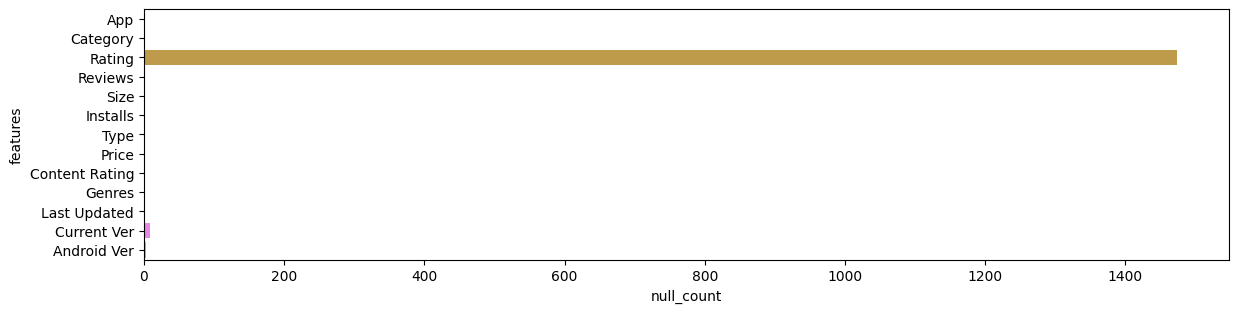

In [8]:
# Visualizing the missing values
df_obj.plot_null()

In [9]:
df_obj.show_all_unique_count()

Unique values
App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64


In [10]:
# Category, Rating, Installs, Type, Content Rating, Android Ver
for col in df_obj.df.columns:
    print('Column : ',col)
    print(df_obj.get_unique(col))
    print()

Column :  App
Unique count :  9660
['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun', 'Text on Photo - Fonteee', 'Name Art Photo Editor - Focus n Filters', 'Tattoo Name On My Photo Editor', 'Mandala Coloring Book', '3D Color Pixel by Number - Sandbox Art Coloring', 'Learn To Draw Kawaii Characters', 'Photo Designer - Write your name with shapes', '350 Diy Room Decor Ideas', 'FlipaClip - Cartoon animation', 'ibis Paint X', 'Logo Maker - Small Business', "Boys Photo Editor - Six Pack & Men's Suit", 'Superheroes Wallpapers | 4K Backgrounds', 'Mcqueen Coloring pages', 'HD Mickey Minnie Wallpapers', 'Harley Quinn wallpapers HD', 'Colorfit - Drawing & Coloring', 'Animated Photo Editor', 'Pencil Sketch Dr

In [11]:
df_obj.get_unique('Installs')

Unique count :  22


['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '50+',
 '100+',
 '500+',
 '10+',
 '1+',
 '5+',
 '0+',
 '0',
 'Free']

The file contains details of app uploaded on playstore like ratings, review, etc.

### Variable Description
1. App : app name
2. Category : app category
3. Rating : ratings given by users
4. Reviews : reviews
5. Size : size of the app
6. Installs : Number of users who installed the app
7. Type :
8. Price : Price of the app at google play
9. Content Rating :
10. Genres :
11. Last Updated :
12. Current Ver : Current version

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [13]:
# Chart - 1 visualization code
# df_obj.get_df()['Category'].value_counts().plot.bar()
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [14]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [15]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [16]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [17]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [18]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [19]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [20]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [21]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [22]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [23]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [24]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [25]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [26]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [27]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***